In [10]:
import matplotlib.pyplot as plt
from sympy import solve
from sympy.abc import x

In [14]:
def get_r(equation, power):
    s = solve(equation)
    return s[0] if power % 2 != 0 else s[1]

def get_p0(r, k):
    return (1 - r) / k

def get_pq(r, k, q): 
    return (1 - r ** (q + 1)) / k

def get_pkn(r, psy, n):
    return psy * (1 - r) * (r ** n)

In [15]:
k = 3
lambd = 1 / 5
mu = 1 / 10

psy = lambd / (k * mu)

profit = 50
expenses = 170
work_time = 9

r = get_r(x + x ** 2 + x ** 3 - (lambd / mu), power=3)

In [16]:
p0 = get_p0(r, k)
print('p0 =', p0)

# а) среднее время ожидания в очереди
temp1 = p0 / (1 - r)
temp2 = (k * (k - 1)) / 2

numerator = r ** 2 * (k * r ** (k - 1) * (1 - r) - (1 - r ** k))
denominator = (1 - r) ** 2
temp3 = numerator / denominator

temp4 = p0 * (1 - r ** k) / (1 - r)
temp5 = (r ** 2) / ((1 - r) ** 2)

b_ = temp1 * (temp2 + temp3) + temp4 * temp5
print('b_ =', b_)

w_ = b_ / lambd
print('Среднее время ожидания в очереди:', w_)

# б) вероятность того, что аттракцион простаивает
p_p = p0 + sum([get_pq(r, k, q) for q in range(1, k)])
print('Вероятность того, что аттракцион простаивает:', p_p)

# в) среднее число человек, ожидающих в очереди 
print('Среднее число человек, ожидающих в очереди:', b_)

# г) вероятность ожидания в очереди 
p_wait_q = sum([get_pq(r, k, q) for q in range(1, k)]) + sum([get_pkn(r, psy, n) for n in range(500)])
print('Вероятность ожидания в очереди:', p_wait_q)

# д) долю времени, в течение которого аттракцион используется 
p_w = 1 - p_p
print('Долю времени, в течение которого аттракцион используется:', p_w)

# е) средние значения выручки и прибыли от использования аттракциона
revenue = profit * k * work_time * p_w * (60 / (1 / mu)) 
print('Среднее значение выручки от использования аттракциона:', revenue)

earnings = expenses * work_time * p_w * (60 / (1 / mu))
print('Среднее значение прибыли от использования аттракциона:', revenue - earnings)



p0 = 0.0631547620779544
b_ = 3.27803957082265
Среднее время ожидания в очереди: 16.3901978541133
Вероятность того, что аттракцион простаивает: 0.333333333333333
Среднее число человек, ожидающих в очереди: 3.27803957082265
Вероятность ожидания в очереди: 0.936845237922046
Долю времени, в течение которого аттракцион используется: 0.666666666666667
Среднее значение выручки от использования аттракциона: 5400.00000000000
Среднее значение прибыли от использования аттракциона: -720.000000000000


r = 0.810535713766137 -> equation = x**3 + x**2 + x - 2.0 

r = 0.741270910566002 -> equation = x**4 + x**3 + x**2 + x - 2.0 

r = 0.709011195150870 -> equation = x**5 + x**4 + x**3 + x**2 + x - 2.0 

r = 0.691994437613488 -> equation = x**6 + x**5 + x**4 + x**3 + x**2 + x - 2.0 

r = 0.682327803828019 -> equation = x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 2.0 

r = 0.676567688589135 -> equation = x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 2.0 

r = 0.673022533611638 -> equation = x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 2.0 

r = 0.670790841970839 -> equation = x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x - 2.0 



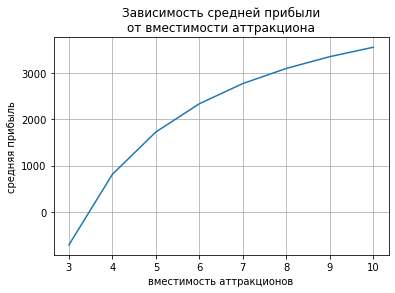

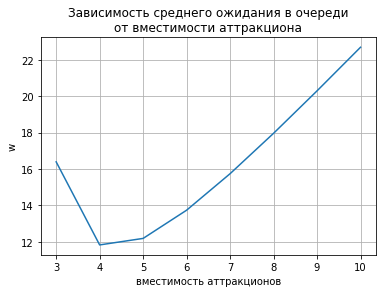

In [17]:
# Определить, как изменятся средняя прибыль и среднее время ожидания 
# в очереди при различных значениях вместимости аттракциона – от 3 до 10 человек

capacity = list(range(3, 11))
profits = []
w_list = []

equation = x + x ** 2 - (lambd / mu)

for c in capacity:
    equation += x ** c
    r = get_r(equation, power=c)
    print('r =', r, '-> equation =', equation, '\n')
    
    p0 = get_p0(r, c)

    temp1 = p0 / (1 - r)
    temp2 = (c * (c - 1)) / 2

    numerator = r ** 2 * (c * r ** (c - 1) * (1 - r) - (1 - r ** c))
    denominator = (1 - r) ** 2
    temp3 = numerator / denominator

    temp4 = p0 * (1 - r ** c) / (1 - r)
    temp5 = (r ** 2) / ((1 - r) ** 2)

    b_ = temp1 * (temp2 + temp3) + temp4 * temp5

    w_ = b_ / lambd
    w_list.append(w_)

    p_p = p0 + sum([get_pq(r, c, q) for q in range(1, c)])
    p_w = 1 - p_p

    revenue = profit * c * work_time * p_w * (60 / (1 / mu)) 
    earnings = expenses * work_time * p_w * (60 / (1 / mu))
    profits.append(revenue - earnings)

plt.plot(capacity, profits)
plt.title('Зависимость средней прибыли\nот вместимости аттракциона')
plt.xlabel('вместимость аттракционов')
plt.ylabel('средняя прибыль')
plt.grid()
plt.show()

plt.plot(capacity, w_list)
plt.title('Зависимость среднего ожидания в очереди\nот вместимости аттракциона')
plt.xlabel('вместимость аттракционов')
plt.ylabel('w')
plt.grid()
plt.show()